In [227]:
import pandas as pd
import json
import datetime

In [239]:
weather_data = pd.read_csv('data/weather_trani/weather_data.csv', delimiter = ';')
weather_data

,time,H_sun,temp,wind_speed
0,20180101:0010,0.0,8.81,2.41
1,20180101:0110,0.0,8.88,2.55
2,20180101:0210,0.0,8.95,2.55
3,20180101:0310,0.0,8.82,2.55
4,20180101:0410,0.0,8.51,2.55
...,...,...,...,...
26299,20201231:1910,0.0,3.06,1.72
26300,20201231:2010,0.0,2.33,1.72
26301,20201231:2110,0.0,1.89,1.79
26302,20201231:2210,0.0,1.55,1.86


In [240]:
from datetime import datetime

# Input string: '20180101:0010'
input_string = '20180101:0010'

# Define the format string to match your input format
format_string = '%Y%m%d:%H%M%S'

dt = []
for el in weather_data['time']:
    # Convert the string to a datetime object
    dt.append(datetime.strptime(el, format_string))
weather_data['Timestamp'] = dt
weather_data = weather_data.drop(columns=['time'])



In [241]:
weather_data

,H_sun,temp,wind_speed,Timestamp
0,0.0,8.81,2.41,2018-01-01 00:01:00
1,0.0,8.88,2.55,2018-01-01 01:01:00
2,0.0,8.95,2.55,2018-01-01 02:01:00
3,0.0,8.82,2.55,2018-01-01 03:01:00
4,0.0,8.51,2.55,2018-01-01 04:01:00
...,...,...,...,...
26299,0.0,3.06,1.72,2020-12-31 19:01:00
26300,0.0,2.33,1.72,2020-12-31 20:01:00
26301,0.0,1.89,1.79,2020-12-31 21:01:00
26302,0.0,1.55,1.86,2020-12-31 22:01:00


Get the right Timestamp and compute the mean power value of consumption and production.

In [242]:
from datetime import datetime 

In [301]:
building_consumption = pd.read_csv("data/Office building.csv")
building_production = pd.read_csv("data/PV plant.csv")

print(f"building_consumption COLUMNS: {building_consumption.columns}")
print(f"building_production COLUMNS: {building_production.columns}")

data_series = []
hours_list = []
data_tmp = []

for index, row in building_consumption.iterrows():
    timestamp_string = row['Timestamp']
    # Split the string into time and timezone parts
    time_part, timezone_part = timestamp_string.split("+")
    timestamp_string = datetime.strptime(time_part, '%H:%M:%S')

    # Split the time part into hours, minutes, and seconds
    hours, minutes, seconds = map(int, time_part.split(":"))
    
    dt = datetime(row['Year'], row['Month'], row['Day'],hours, minutes, seconds )
    
    data_tmp.append(datetime(row['Year'], row['Month'], row['Day']))
    hours_list.append(hours)
    data_series.append(dt)
    time_series.append(timestamp_string)

building_consumption['Timestamp'] = data_series
building_consumption['hour'] = hours_list
building_consumption['data_tmp'] = data_tmp


#avg_power_consum = building_consumption.groupby('Timestamp')['Power (W)'].mean()
#avg_power_consum = (pd.DataFrame(avg_power_consum))

building_consumption COLUMNS: Index(['Year', 'Month', 'Day', 'Timestamp', 'Power (W)', 'Energy (Wh)'], dtype='object')
building_production COLUMNS: Index(['Year', 'Month', 'Day', 'Timestamp', 'Power (W)'], dtype='object')


In [286]:
tmp = pd.DataFrame(building_consumption.groupby(['data_tmp','hour'])['Power (W)'].mean().reset_index())
dt = []

for index, row in tmp.iterrows():
    dt.append(row['data_tmp'] + timedelta(hours=row['hour']))

building_consumption_def = pd.DataFrame(columns=['Timestamp','power x h'])
building_consumption_def['Timestamp'] = dt
building_consumption_def['power x h'] = tmp['Power (W)']

In [304]:
tmp = []
for el in building_consumption_def['Timestamp']:
    tmp.append(el.replace(minute=1))

building_consumption_def['Timestamp'] = tmp

In [305]:
building_consumption_def

,Timestamp,power x h
0,2018-06-12 14:01:00,32454.375000
1,2018-06-12 15:01:00,19558.733333
2,2018-06-12 16:01:00,17365.166667
3,2018-06-12 17:01:00,13120.900000
4,2018-06-12 18:01:00,12720.100000
...,...,...
22394,2021-01-01 20:01:00,62716.083333
22395,2021-01-01 21:01:00,62587.400000
22396,2021-01-01 22:01:00,60960.983333
22397,2021-01-01 23:01:00,54571.033333


In [288]:
data_series = []
hours_list = []
data_tmp = []

for index, row in building_production.iterrows():
    timestamp_string = row['Timestamp']
    # Split the string into time and timezone parts
    time_part, timezone_part = timestamp_string.split("+")
    timestamp_string = datetime.strptime(time_part, '%H:%M:%S')

    # Split the time part into hours, minutes, and seconds
    hours, minutes, seconds = map(int, time_part.split(":"))
    
    dt = datetime(row['Year'], row['Month'], row['Day'],hours, minutes, seconds )
    
    data_tmp.append(datetime(row['Year'], row['Month'], row['Day']))
    hours_list.append(hours)
    data_series.append(dt)
    time_series.append(timestamp_string)

building_production['Timestamp'] = data_series
building_production['hour'] = hours_list
building_production['data_tmp'] = data_tmp

#avg_power_product = building_production.groupby('Timestamp')['Power (W)'].mean()
#avg_power_product = (pd.DataFrame(avg_power_product))

In [289]:
tmp = pd.DataFrame(building_production.groupby(['data_tmp','hour'])['Power (W)'].mean().reset_index())
dt = []

for index, row in tmp.iterrows():
    dt.append(row['data_tmp'] + timedelta(hours=row['hour']))

building_production_def = pd.DataFrame(columns=['Timestamp','power x h'])
building_production_def['Timestamp'] = dt
building_production_def['power x h'] = tmp['Power (W)']

In [306]:
tmp = []
for el in building_production_def['Timestamp']:
    tmp.append(el.replace(minute=1))

building_production_def['Timestamp'] = tmp

In [307]:
building_production_def

,Timestamp,power x h
0,2018-08-01 01:01:00,32453.728630
1,2018-08-01 02:01:00,19558.091533
2,2018-08-01 03:01:00,17364.528625
3,2018-08-01 04:01:00,13120.264852
4,2018-08-01 05:01:00,12719.464938
...,...,...
8752,2019-07-31 20:01:00,107382.484717
8753,2019-07-31 21:01:00,114818.205250
8754,2019-07-31 22:01:00,124963.008750
8755,2019-07-31 23:01:00,121586.597283


In [308]:
# merging on power 

building_production_def['power x h'] = building_production_def['power x h'] + building_consumption_def[building_consumption_def.index.isin(building_production_def.index)]['power x h']


In [309]:
df_merged_power_consum = building_consumption_def.merge(weather_data, on='Timestamp')
df_merged_power_product = building_production_def.merge(weather_data, on='Timestamp')

In [314]:
df_merged_power_product

,Timestamp,power x h,H_sun,temp,wind_speed
0,2018-08-01 01:01:00,64908.103630,0.00,21.35,1.45
1,2018-08-01 02:01:00,39116.824867,0.00,20.46,1.38
2,2018-08-01 03:01:00,34729.695292,0.00,19.80,1.31
3,2018-08-01 04:01:00,26241.164852,0.00,19.29,1.24
4,2018-08-01 05:01:00,25439.564938,11.04,19.76,0.97
...,...,...,...,...,...
8752,2019-07-31 20:01:00,214730.718050,0.00,24.21,0.76
8753,2019-07-31 21:01:00,229602.538583,0.00,23.68,0.55
8754,2019-07-31 22:01:00,249892.175417,0.00,23.04,0.41
8755,2019-07-31 23:01:00,243139.763950,0.00,22.35,0.62


In [315]:
df_merged_power_consum.to_csv('data/exported_merged_power_consum.csv')
df_merged_power_product.to_csv('data/exported_merged_power_product.csv')

In [342]:
def rescale_to_range(values, new_min, new_max):
    old_min = min(values)
    old_max = max(values)
    
    scaled_values = [(new_max - new_min) * (x - old_min) / (old_max - old_min) + new_min for x in values]
    
    return scaled_values

new_min = df_merged_power_product['temp'].min()
new_max = df_merged_power_product['temp'].max()

scaled_data = rescale_to_range(df_merged_power_product['power x h'], new_min, new_max)
print(scaled_data)


[9.672246295285051, 7.43283253578408, 7.051905384977738, 6.31486043115002, 6.24525884636604, 6.139678874240678, 6.120926642796739, 5.981292241322359, 5.991049137419795, 5.96842446822256, 5.992993403691127, 6.591188107646554, 6.573547004930823, 6.5682254089445955, 6.629726316838632, 7.261072404793055, 6.947838949229775, 7.053971995989128, 20.296331654122685, 23.952230099424717, 23.621529307361563, 23.087042817351666, 23.061165454434597, 23.643468209562787, 24.489204992810116, 21.43840504854173, 19.510087262714812, 16.637163457674678, 16.074845837720115, 15.746310583517374, 15.501205966864724, 14.309588482529648, 12.851280402509499, 5.408421987440132, 3.038862288861248, 3.9061065803238315, 4.1730458209537655, 7.564896272239359, 11.470547599751212, 16.207895698901112, 16.488646433147938, 21.91355221797354, 22.568848836255963, 23.238971712338593, 23.273101264693665, 24.306275098114373, 24.351897842047435, 28.71772826186858, 29.36420940926366, 24.585418120381203, 22.30466150968069, 17.79931

In [345]:
df_merged_power_product['Timestamp'].tail(24)

8733   2019-07-31 01:01:00
8734   2019-07-31 02:01:00
8735   2019-07-31 03:01:00
8736   2019-07-31 04:01:00
8737   2019-07-31 05:01:00
8738   2019-07-31 06:01:00
8739   2019-07-31 07:01:00
8740   2019-07-31 08:01:00
8741   2019-07-31 09:01:00
8742   2019-07-31 10:01:00
8743   2019-07-31 11:01:00
8744   2019-07-31 12:01:00
8745   2019-07-31 13:01:00
8746   2019-07-31 14:01:00
8747   2019-07-31 15:01:00
8748   2019-07-31 16:01:00
8749   2019-07-31 17:01:00
8750   2019-07-31 18:01:00
8751   2019-07-31 19:01:00
8752   2019-07-31 20:01:00
8753   2019-07-31 21:01:00
8754   2019-07-31 22:01:00
8755   2019-07-31 23:01:00
8756   2019-08-01 00:01:00
Name: Timestamp, dtype: datetime64[ns]

In [348]:
df_merged_power_product

,Timestamp,power x h,H_sun,temp,wind_speed
0,2018-08-01 01:01:00,64908.103630,0.00,21.35,1.45
1,2018-08-01 02:01:00,39116.824867,0.00,20.46,1.38
2,2018-08-01 03:01:00,34729.695292,0.00,19.80,1.31
3,2018-08-01 04:01:00,26241.164852,0.00,19.29,1.24
4,2018-08-01 05:01:00,25439.564938,11.04,19.76,0.97
...,...,...,...,...,...
8752,2019-07-31 20:01:00,214730.718050,0.00,24.21,0.76
8753,2019-07-31 21:01:00,229602.538583,0.00,23.68,0.55
8754,2019-07-31 22:01:00,249892.175417,0.00,23.04,0.41
8755,2019-07-31 23:01:00,243139.763950,0.00,22.35,0.62


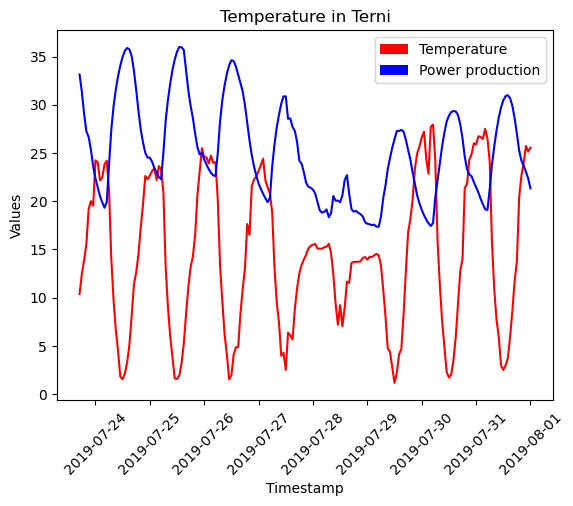

In [347]:

plt.plot(df_merged_power_product['Timestamp'].tail(200), pd.DataFrame(scaled_data).tail(200), color='red')
plt.plot(df_merged_power_product['Timestamp'].tail(200), df_merged_power_product['temp'].tail(200), color='blue')
plt.title('Temperature in Terni')
plt.xlabel('Timestamp')
plt.ylabel('Values')

# Create custom color patches for the legend
blue_patch = plt.Rectangle((0, 0), 1, 1, fc='red', label='Temperature')
red_patch = plt.Rectangle((0, 0), 1, 1, fc='blue', label='Power production')
plt.xticks(rotation=45)

# Add the legend
plt.legend(handles=[blue_patch, red_patch])

plt.show()

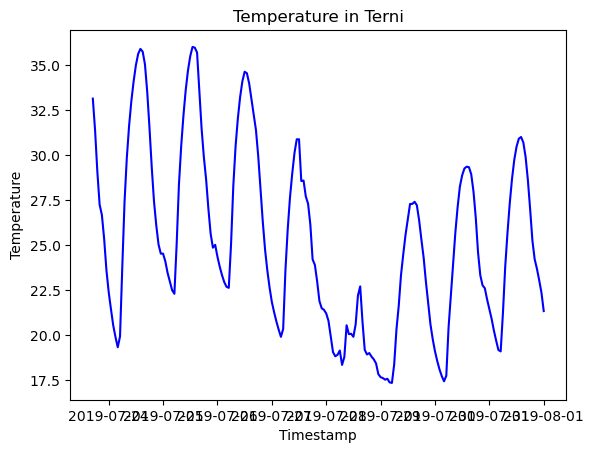

In [333]:
plt.plot(df_merged_power_product['Timestamp'].tail(200), df_merged_power_product['temp'].tail(200), color='blue')
plt.title('Temperature in Terni')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.show()

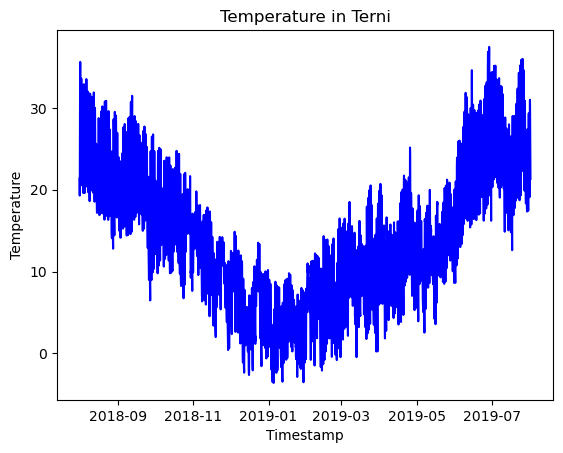

In [319]:
plt.plot(df_merged_power_product['Timestamp'], df_merged_power_product['temp'], color='blue')
plt.title('Temperature in Terni')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.show()

Energy (Wh) consumption/production plotting